<a href="https://colab.research.google.com/github/tejeshreddymeka/ML_based_IDS/blob/master/Ml_based_IDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
files.upload()

MessageError: ignored

# Environment Setup

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!pip install -q kaggle
!kaggle datasets list -s UNSW_NB15
!kaggle datasets download -d mrwellsdavid/unsw-nb15
!mkdir unsw-nb15
!unzip unsw-nb15.zip -d unsw-nb15/


ref                     title       size  lastUpdated          downloadCount  
----------------------  ---------  -----  -------------------  -------------  
mrwellsdavid/unsw-nb15  UNSW_NB15  149MB  2019-01-29 01:06:31            687  
 99% 147M/149M [00:02<00:00, 87.7MB/s]
100% 149M/149M [00:02<00:00, 75.4MB/s]
Archive:  unsw-nb15.zip
  inflating: unsw-nb15/NUSW-NB15_features.csv  
  inflating: unsw-nb15/UNSW-NB15_1.csv  
  inflating: unsw-nb15/UNSW-NB15_2.csv  
  inflating: unsw-nb15/UNSW-NB15_3.csv  
  inflating: unsw-nb15/UNSW-NB15_4.csv  
  inflating: unsw-nb15/UNSW-NB15_LIST_EVENTS.csv  
  inflating: unsw-nb15/UNSW_NB15_testing-set.csv  
  inflating: unsw-nb15/UNSW_NB15_training-set.csv  


In [0]:
!pip install tensorflow==1.14.0

     |████████████████████████████████| 109.2MB 31.5MB/s 
     |████████████████████████████████| 3.2MB 41.0MB/s 
     |████████████████████████████████| 491kB 45.7MB/s 
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [0]:
!pip install tensorflow-gpu==1.14.0


     |████████████████████████████████| 377.0MB 79kB/s 


In [0]:
import tensorflow as tf
print(tf.__version__)

1.14.0


In [0]:
!wget https://developer.nvidia.com/compute/cuda/9.0/Prod/local_installers/cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64-deb
!dpkg -i cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64-deb
!apt-key add /var/cuda-repo-9-0-local/7fa2af80.pub
!apt-get update
!apt-get install cuda=9.0.176-1

--2019-10-23 13:40:36--  https://developer.nvidia.com/compute/cuda/9.0/Prod/local_installers/cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64-deb
Resolving developer.nvidia.com (developer.nvidia.com)... 192.229.162.216
Connecting to developer.nvidia.com (developer.nvidia.com)|192.229.162.216|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://developer.download.nvidia.com/compute/cuda/9.0/secure/Prod/local_installers/cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64.deb?p7UMd-zmjBlAVVJ87cgT_1vfsakFcGUrCgg3M4nxLJikLmCFkBUQAv3VGr2nEnMsquqrYAwY4mwtdjbVd8cppnihlSxZaYkIH6mPetQaMBFXnnxR2kzVQ_huq4mXEIG7HFypPAedYoD1hizCM-V2AIODeAYQuPvAhB9ymVgQoK49HGdSJ99tohYylAjmA6UMdyZL3V9F1mbiwLXV79PN [following]
--2019-10-23 13:40:37--  https://developer.download.nvidia.com/compute/cuda/9.0/secure/Prod/local_installers/cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64.deb?p7UMd-zmjBlAVVJ87cgT_1vfsakFcGUrCgg3M4nxLJikLmCFkBUQAv3VGr2nEnMsquqrYAwY4mwtdjbVd8cppnihlSxZaYkIH6mPetQaMBFXnn

In [0]:
!pip uninstall -y tensorboard
!pip install --force-reinstall tf-nightly-2.0-preview
#!pip install -q tf-nightly-2.0-preview


Uninstalling tensorboard-1.14.0:
  Successfully uninstalled tensorboard-1.14.0
     |████████████████████████████████| 95.2MB 34.1MB/s 
     |████████████████████████████████| 61kB 22.1MB/s 
     |████████████████████████████████| 20.0MB 1.8MB/s 
     |████████████████████████████████| 71kB 20.3MB/s 
     |████████████████████████████████| 1.3MB 27.3MB/s 
     |████████████████████████████████| 450kB 40.6MB/s 
     |████████████████████████████████| 51kB 21.6MB/s 
     |████████████████████████████████| 112kB 50.4MB/s 
     |████████████████████████████████| 51kB 16.6MB/s 
     |████████████████████████████████| 2.2MB 23.2MB/s 
     |████████████████████████████████| 3.8MB 29.7MB/s 
     |████████████████████████████████| 583kB 40.6MB/s 
     |████████████████████████████████| 2.9MB 27.3MB/s 
     |████████████████████████████████| 92kB 18.5MB/s 
     |████████████████████████████████| 327kB 44.8MB/s 
  Created wheel for termcolor: filename=termcolor-1.1.0-cp36-none-any.whl size=4832 s

# Source Code

In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from collections import defaultdict
from sklearn.model_selection import train_test_split

import tensorflow as tf




from sklearn.model_selection import cross_val_score, GridSearchCV

from sklearn.metrics import confusion_matrix,classification_report

import pickle

import time
import datetime
import os


In [0]:
from tensorflow.python.framework import ops

In [0]:

ops.reset_default_graph()

!rm -rf tensorboard_logs

In [0]:

# Load the TensorBoard notebook extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.options.display.max_colwidth = 300
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# from importlib import reload
# reload(plt)
#%matplotlib inline
#%matplotlib auto
#plt.style.use('seaborn-whitegrid')
#sns.set(style="ticks", color_codes=True)

In [0]:
#datasetPath = "../Datasets/UNSW_NB15/"
datasetPath = "./unsw-nb15/"

In [0]:
featuresFileName = datasetPath + "NUSW-NB15_features.csv"
#features = pd.read_csv(featuresFileName)
    
rows = []
with open(featuresFileName, 'rb') as csvFile:
    for line in csvFile:
        line = str(line)[2:-5].split(",")
        row = [line[1], line[2], ",".join(line[3:]).replace('"','')]
        rows.append(row)
featureHeaders = rows[0]
featuresDf = pd.DataFrame(rows[1:], columns=featureHeaders)
print("features description")
featuresDf

features description


,Name,Type,Description
0,srcip,nominal,Source IP address
1,sport,integer,Source port number
2,dstip,nominal,Destination IP address
3,dsport,integer,Destination port number
4,proto,nominal,Transaction protocol
5,state,nominal,"Indicates to the state and its dependent protocol, e.g. ACC, CLO, CON, ECO, ECR, FIN, INT, MAS, PAR, REQ, RST, TST, TXD, URH, URN, and (-) (if not used state)"
6,dur,Float,Record total duration
7,sbytes,Integer,Source to destination transaction bytes
8,dbytes,Integer,Destination to source transaction bytes
9,sttl,Integer,Source to destination time to live value


In [0]:
df1 = pd.read_csv(datasetPath + "UNSW_NB15_training-set.csv")
df2 = pd.read_csv(datasetPath + "UNSW_NB15_testing-set.csv")

In [0]:
df = df1.append(df2, ignore_index=True)
df.shape
df.tail()

(257673, 45)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
257668,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,57,0,0,0,24,2,24,24,13,24,0,0,0,24,24,0,Generic,1
257669,175338,0.505762,tcp,-,FIN,10,8,620,354,33.612649,254,252,8.826286e+03,4903.492188,2,1,54.400111,66.98057,3721.068786,120.177727,255,3518776216,3453092386,255,0.09944,0.036895,0.062545,62,44,0,0,1,1,1,1,1,2,0,0,0,1,1,0,Shellcode,1
257670,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,57,0,0,0,12,2,3,3,3,13,0,0,0,3,12,0,Generic,1
257671,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,57,0,0,0,30,2,30,30,14,30,0,0,0,30,30,0,Generic,1
257672,175341,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,57,0,0,0,30,2,30,30,16,30,0,0,0,30,30,0,Generic,1


In [0]:
#Frequency distribution of classes"
attack_cat_dist = pd.crosstab(index=df["attack_cat"],  # Make a crosstab
                              columns="count")      # Name the count column   
attack_cat_dist

col_0,count
attack_cat,
Analysis,2677
Backdoor,2329
DoS,16353
Exploits,44525
Fuzzers,24246
Generic,58871
Normal,93000
Reconnaissance,13987
Shellcode,1511


## Preprocessing

In [0]:
print("Any missing sample in dataset: ",df.isnull().values.any())

catogorical_columns = ['proto', 'service', 'state', 'attack_cat']

le = defaultdict(LabelEncoder)

# Encoding the variable
for col in catogorical_columns:
    df[col] = le[col].fit_transform(df[col])

df.head()

Any missing sample in dataset:  False


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,119,0,5,2,0,496,0,90909.0902,254,0,180363632.0,0.0,0,0,0.011,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,6,0
1,2,0.000008,119,0,5,2,0,1762,0,125000.0003,254,0,881000000.0,0.0,0,0,0.008,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,6,0
2,3,0.000005,119,0,5,2,0,1068,0,200000.0051,254,0,854400000.0,0.0,0,0,0.005,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,6,0
3,4,0.000006,119,0,5,2,0,900,0,166666.6608,254,0,600000000.0,0.0,0,0,0.006,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,6,0
4,5,0.000010,119,0,5,2,0,2126,0,100000.0025,254,0,850400000.0,0.0,0,0,0.010,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,6,0


In [0]:
x = df.loc[:,'dur':'is_sm_ips_ports']
y = df[['label']]
#y = df[['attack_cat']]

In [0]:
scaler = MinMaxScaler(feature_range=(0, 1))
x = pd.DataFrame(scaler.fit_transform(x),columns = x.columns)

In [0]:


x.head()
x.shape
y.shape

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
0,1.833334e-07,0.901515,0.0,0.5,0.000094,0.0,0.000033,0.0,0.090909,0.996078,0.0,0.030121,0.0,0.0,0.0,1.303758e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.151351,0.0,0.0,0.0,0.016129,0.333333,0.000000,0.000000,0.0,0.015625,0.0,0.0,0.0,0.000000,0.016393,0.0
1,1.333334e-07,0.901515,0.0,0.5,0.000094,0.0,0.000121,0.0,0.125000,0.996078,0.0,0.147128,0.0,0.0,0.0,9.481875e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.579054,0.0,0.0,0.0,0.016129,0.333333,0.000000,0.000000,0.0,0.015625,0.0,0.0,0.0,0.000000,0.016393,0.0
2,8.333335e-08,0.901515,0.0,0.5,0.000094,0.0,0.000073,0.0,0.200000,0.996078,0.0,0.142685,0.0,0.0,0.0,5.926172e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.344595,0.0,0.0,0.0,0.032258,0.333333,0.000000,0.000000,0.0,0.031250,0.0,0.0,0.0,0.000000,0.032787,0.0
3,1.000000e-07,0.901515,0.0,0.5,0.000094,0.0,0.000061,0.0,0.166667,0.996078,0.0,0.100200,0.0,0.0,0.0,7.111406e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.287838,0.0,0.0,0.0,0.032258,0.333333,0.017241,0.017241,0.0,0.031250,0.0,0.0,0.0,0.016949,0.032787,0.0
4,1.666667e-07,0.901515,0.0,0.5,0.000094,0.0,0.000146,0.0,0.100000,0.996078,0.0,0.142017,0.0,0.0,0.0,1.185234e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.702027,0.0,0.0,0.0,0.032258,0.333333,0.017241,0.017241,0.0,0.031250,0.0,0.0,0.0,0.016949,0.032787,0.0


(257673, 42)

(257673, 1)

In [0]:

train_x_df, test_x_df, train_y_df, test_y_df = train_test_split(x, y, test_size = 0.3, random_state = 20)

In [0]:
train_x = train_x_df.to_numpy(dtype=np.float32)
train_y = train_y_df.to_numpy(dtype=np.int32)
test_x = test_x_df.to_numpy(dtype=np.float32)
test_y = test_y_df.to_numpy(dtype=np.int32)

In [0]:
train_x.shape
test_y.shape

(180371, 42)

(77302, 1)

In [0]:
np.random.seed(20)
#tf.set_random_seed(20)

In [0]:
def get_batch(x_vals, y_vals, batch_size):
    rand_indices = np.random.choice(len(x_vals), size=batch_size)
    rand_x = x_vals[rand_indices]
    rand_y = y_vals[rand_indices]
    return rand_x, rand_y

## Logistic Regression

In [0]:
ops.reset_default_graph()
sess = tf.Session()

In [0]:
batch_size = 500
learning_rate = 0.02
epochs = 10000

disp_iteration = 500

n_features = train_x.shape[1]


In [0]:
x_data = tf.placeholder(shape = [None, n_features], dtype=tf.float32)
y_target = tf.placeholder(shape = [None, 1], dtype= tf.float32)

In [0]:
A = tf.Variable(tf.random_normal(shape= [n_features, 1]))
b = tf.Variable(tf.random_normal(shape = [1, 1]))

In [0]:
model_output = tf.add( tf.matmul( x_data, A), b)

In [0]:
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=model_output, labels=y_target))

In [0]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train_step = optimizer.minimize(loss)

In [0]:
sess.run(tf.global_variables_initializer())

In [0]:
prediction = tf.round(tf.sigmoid(model_output))
predictions_correct = tf.cast( tf.equal(prediction, y_target), tf.float32)
accuracy = tf.reduce_mean(predictions_correct)

In [0]:
loss_vec = []
train_acc = []
test_acc = []
for epoch in range(epochs):
    rand_x, rand_y = get_batch(train_x, train_y, batch_size)

    start_time = time.time()
    sess.run(train_step, feed_dict= { x_data: rand_x, y_target: rand_y})
    end_time = time.time()

    if (epoch + 1)%disp_iteration == 0:
        cur_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
        loss_vec.append(cur_loss) 
        cur_train_acc = sess.run(accuracy, feed_dict={x_data: train_x, y_target: train_y})
        train_acc.append(cur_train_acc)
        cur_test_acc = sess.run(accuracy, feed_dict={x_data: test_x, y_target: test_y})
        test_acc.append(cur_test_acc)
        print('epoch %d ( %.6f ) Loss = %.6f Train accuracy: %.6f Test accuracy: %.6f' % (epoch+1, end_time - start_time, cur_loss, cur_train_acc, cur_test_acc))
 

epoch 500 ( 0.001409 ) Loss = 0.607570 Train accuracy: 0.671571 Test accuracy: 0.670617
epoch 1000 ( 0.001477 ) Loss = 0.516252 Train accuracy: 0.738356 Test accuracy: 0.736216
epoch 1500 ( 0.001531 ) Loss = 0.487943 Train accuracy: 0.760205 Test accuracy: 0.758130
epoch 2000 ( 0.001509 ) Loss = 0.434914 Train accuracy: 0.765727 Test accuracy: 0.764133
epoch 2500 ( 0.001490 ) Loss = 0.415878 Train accuracy: 0.772109 Test accuracy: 0.769890
epoch 3000 ( 0.001547 ) Loss = 0.423203 Train accuracy: 0.825848 Test accuracy: 0.825063
epoch 3500 ( 0.001457 ) Loss = 0.373808 Train accuracy: 0.829002 Test accuracy: 0.827960
epoch 4000 ( 0.001321 ) Loss = 0.396221 Train accuracy: 0.830516 Test accuracy: 0.829461
epoch 4500 ( 0.001446 ) Loss = 0.372549 Train accuracy: 0.844354 Test accuracy: 0.843885
epoch 5000 ( 0.001270 ) Loss = 0.370861 Train accuracy: 0.845679 Test accuracy: 0.844998
epoch 5500 ( 0.001538 ) Loss = 0.344650 Train accuracy: 0.847847 Test accuracy: 0.847106
epoch 6000 ( 0.001395 

Text(0.5, 1.0, 'Cross Entropy Loss per Generation')

Text(0.5, 0, 'Generation')

Text(0, 0.5, 'Cross Entropy Loss')

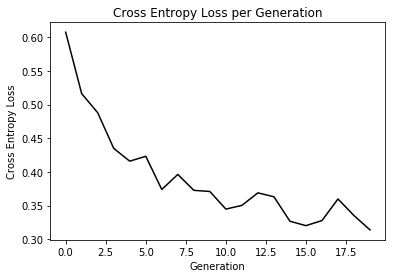

Text(0.5, 1.0, 'Train and Test Accuracy')

Text(0.5, 0, 'Generation')

Text(0, 0.5, 'Accuracy')

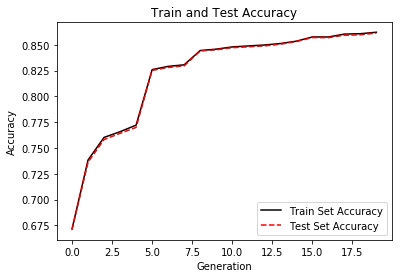

In [0]:
plt.plot(loss_vec, 'k-')
plt.title('Cross Entropy Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Cross Entropy Loss')
plt.show()

# Plot train and test accuracy
plt.plot(train_acc, 'k-', label='Train Set Accuracy')
plt.plot(test_acc, 'r--', label='Test Set Accuracy')
plt.title('Train and Test Accuracy')
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [0]:
sess.close()

## SVM

In [0]:
ops.reset_default_graph()

In [0]:
epochs = 10000
batch_size = 500

In [0]:
X = train_x
Y = train_y
example_id = np.array(['%d' % i for i in range(len(Y))])

x_column_name = 'x'
example_id_column_name = 'example_id'

train_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={x_column_name: X, example_id_column_name: example_id},
    y=Y,
    num_epochs= None,
    shuffle=True)

svm = tf.contrib.learn.SVM(
    example_id_column=example_id_column_name,
    feature_columns=(tf.contrib.layers.real_valued_column(
        column_name=x_column_name, dimension= train_x.shape[1]),),
    l2_regularization=0.1
    )

svm.fit(input_fn=train_input_fn, steps = epochs)


Instructions for updating:
Please switch to tf.contrib.estimator.*_head.
Instructions for updating:
Please replace uses of any Estimator from tf.contrib.learn with an Estimator from tf.estimator.*
Instructions for updating:
When switching to tf.estimator.Estimator, use tf.estimator.RunConfig instead.
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f58622dc518>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoint

SVM(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._BinarySvmHead object at 0x7f58622dc630>, 'feature_columns': (_RealValuedColumn(column_name='x', dimension=42, default_value=None, dtype=tf.float32, normalizer=None),), 'optimizer': <tensorflow.contrib.linear_optimizer.python.sdca_optimizer.SDCAOptimizer object at 0x7f58622dc5f8>, 'weight_column_name': None, 'update_weights_hook': <tensorflow.contrib.learn.python.learn.estimators.linear._SdcaUpdateWeightsHook object at 0x7f58622dc940>})

In [0]:

test_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={x_column_name: X, example_id_column_name: example_id},
    y=Y,
    num_epochs=1,
    shuffle=False)


In [0]:
predictions =svm.predict(input_fn=test_input_fn)

INFO:tensorflow:Created variable linear/bias_weight:0, with device=
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /tmp/tmpcjy653ea/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [0]:
test_example_id = np.array(['%d' % i for i in range(len(test_y))])
test_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={
        x_column_name: test_x,
        example_id_column_name: test_example_id
       },
    y=test_y,
    num_epochs= 1,
    shuffle=False)


eval_results = svm.evaluate(input_fn= test_input_fn )
print("")
eval_results

INFO:tensorflow:Created variable linear/bias_weight:0, with device=
INFO:tensorflow:Starting evaluation at 2019-10-23T15:30:29Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpcjy653ea/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-10-23-15:30:30
INFO:tensorflow:Saving dict for global step 10000: accuracy = 0.8951903, global_step = 10000, loss = 0.22908354



{'accuracy': 0.8951903, 'global_step': 10000, 'loss': 0.22908354}

## Random Forest

In [0]:
ops.reset_default_graph()

In [0]:
num_steps = 1000
batch_size = 1000
num_classes = 2 
num_features = train_x.shape[1]
num_trees = 20
max_nodes = 500

In [0]:
# Input and Target data
X = tf.placeholder(tf.float32, shape=[None, num_features])
# For random forest, labels must be integers (the class id)
Y = tf.placeholder(tf.int32, shape=[None, 1])

In [0]:
from tensorflow.contrib.tensor_forest.python import tensor_forest

In [0]:
# Random Forest Parameters
hparams = tensor_forest.ForestHParams(num_classes=num_classes,
                                      num_features=num_features,
                                      num_trees=num_trees,
                                      max_nodes=max_nodes).fill()

In [0]:
# Build the Random Forest
forest_graph = tensor_forest.RandomForestGraphs(hparams)
# Get training graph and loss
train_op = forest_graph.training_graph(X, Y)
loss_op = forest_graph.training_loss(X, Y)

INFO:tensorflow:Constructing forest with params = 
INFO:tensorflow:{'num_trees': 20, 'max_nodes': 500, 'bagging_fraction': 1.0, 'feature_bagging_fraction': 1.0, 'num_splits_to_consider': 10, 'max_fertile_nodes': 0, 'split_after_samples': 250, 'valid_leaf_threshold': 1, 'dominate_method': 'bootstrap', 'dominate_fraction': 0.99, 'model_name': 'all_dense', 'split_finish_name': 'basic', 'split_pruning_name': 'none', 'collate_examples': False, 'checkpoint_stats': False, 'use_running_stats_method': False, 'initialize_average_splits': False, 'inference_tree_paths': False, 'param_file': None, 'split_name': 'less_or_equal', 'early_finish_check_every_samples': 0, 'prune_every_samples': 0, 'num_classes': 2, 'num_features': 42, 'bagged_num_features': 42, 'bagged_features': None, 'regression': False, 'num_outputs': 1, 'num_output_columns': 3, 'base_random_seed': 0, 'leaf_model_type': 0, 'stats_model_type': 0, 'finish_type': 0, 'pruning_type': 0, 'split_type': 0}


In [0]:
# Measure the accuracy
infer_op, _, _ = forest_graph.inference_graph(X)
correct_prediction = tf.equal(tf.argmax(infer_op, 1), tf.cast(Y, tf.int64))
accuracy_op = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


In [0]:
from tensorflow.python.ops import resources

In [0]:
# Initialize the variables (i.e. assign their default value) and forest resources
init_vars = tf.group(tf.global_variables_initializer(),
    resources.initialize_resources(resources.shared_resources()))


In [0]:
# Start TensorFlow session
sess = tf.Session()

# Run the initializer
sess.run(init_vars)


In [0]:
# Training
for i in range(1, num_steps + 1):
    # Prepare Data
    # Get the next batch of MNIST data (only images are needed, not labels)
    batch_x, batch_y = get_batch(train_x, train_y, batch_size)
    _, l = sess.run([train_op, loss_op], feed_dict={X: batch_x, Y: batch_y})
    if i % 500 == 0 or i == 1 or i==num_steps:
        acc = sess.run(accuracy_op, feed_dict={X: batch_x, Y: batch_y})
        print('Step %i, Loss: %f, Acc: %f' % (i, l, acc))

Step 1, Loss: -1.900000, Acc: 0.498082
Step 500, Loss: -501.000000, Acc: 0.537466
Step 1000, Loss: -501.000000, Acc: 0.538070


In [0]:
# Test Model
print("Test Accuracy:", sess.run(accuracy_op, feed_dict={X: test_x[:10000], Y: test_y[:10000]}))

Test Accuracy: 0.5467346


In [0]:
sess.close()

## Gradient Boosted Decision Tree (GBDT)

In [0]:
ops.reset_default_graph()

In [0]:
# Use entire batch since this is such a small dataset.
NUM_EXAMPLES = len(train_y)

def make_input_fn(X, y, n_epochs=None, shuffle=True):
  def input_fn():
    dataset = tf.data.Dataset.from_tensor_slices((X.to_dict(orient='list'), y))
    if shuffle:
      dataset = dataset.shuffle(NUM_EXAMPLES)
    # For training, cycle thru dataset as many times as need (n_epochs=None).
    dataset = (dataset
      .repeat(n_epochs)
      .batch(NUM_EXAMPLES))
    return dataset
  return input_fn

# Training and evaluation input functions.
train_input_fn = make_input_fn(train_x_df, train_y_df)
eval_input_fn = make_input_fn(test_x_df, test_y_df, shuffle=False, n_epochs=1)

In [0]:
fc = tf.feature_column
feature_columns = []
for feature_name in train_x_df.columns:
    feature_columns.append(fc.numeric_column(feature_name,dtype=tf.float32))


In [0]:
params = {
  'n_trees': 60,
  'max_depth': 10,
  'n_batches_per_layer': 1,
  # You must enable center_bias = True to get DFCs. This will force the model to
  # make an initial prediction before using any features (e.g. use the mean of
  # the training labels for regression or log odds for classification when
  # using cross entropy loss).
  'center_bias': True
}

#est = tf.estimator.BoostedTreesClassifier(feature_columns, **params)
# Train model.
#est.train(train_input_fn, max_steps=100)

# Evaluation.
#results = est.evaluate(eval_input_fn)


In [0]:
#pd.Series(results).to_frame()

In [0]:
in_memory_params = dict(params)
in_memory_params['n_batches_per_layer'] = 1
# In-memory input_fn does not use batching.
def make_inmemory_train_input_fn(X, y):
  def input_fn():
    return dict(X), y
  return input_fn
train_input_fn = make_inmemory_train_input_fn(train_x_df, train_y_df)

# Train the model.
est = tf.estimator.BoostedTreesClassifier(
    feature_columns, 
    train_in_memory=True, 
    **in_memory_params)

est.train(train_input_fn)


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpylla4t1m', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f58633d6da0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create 

In [0]:
results = est.evaluate(eval_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-10-23T15:37:25Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpylla4t1m/model.ckpt-603
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-10-23-15:37:31
INFO:tensorflow:Saving dict for global step 603: accuracy = 0.9483843, accuracy_baseline = 0.63760316, auc = 0.9916686, auc_precision_recall = 0.9953775, average_loss = 0.10781664, global_step = 603, label/mean = 0.63760316, loss = 0.10781664, precision = 0.96316975, prediction/mean = 0.63856846, recall = 0.95558757
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'_Resource' object has no attribute 'name'
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 603: /tmp/tmpylla4t1m/model.ckpt-603


In [0]:
pd.Series(results).to_frame()

,0
accuracy,0.948384
accuracy_baseline,0.637603
auc,0.991669
auc_precision_recall,0.995377
average_loss,0.107817
label/mean,0.637603
loss,0.107817
precision,0.963170
prediction/mean,0.638568
recall,0.955588


## Neural Network

In [0]:
from tensorflow.keras.layers import *

### NN

In [0]:
n_features = train_x.shape[1]
n_hidden1 = 50
n_hidden2 = 100
n_hidden3 = 50
epochs = 10

n_classes = 2

In [0]:
ops.reset_default_graph()

In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(n_features, activation='relu'),
  tf.keras.layers.Dense(n_hidden1, activation='relu'),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(n_hidden2, activation='softmax'),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(n_hidden2, activation='relu'),
  tf.keras.layers.Dense(n_classes, activation='softmax')
])

In [0]:
model.compile(optimizer= tf.keras.optimizers.Adam(),
            loss= tf.keras.losses.SparseCategoricalCrossentropy(),
            metrics=['accuracy'])

In [0]:
model.fit(train_x, train_y, epochs= epochs)

Epoch 1/10
180371/180371 [==============================] - 22s 123us/sample - loss: 0.2175 - acc: 0.8944
Epoch 2/10
180371/180371 [==============================] - 22s 122us/sample - loss: 0.1694 - acc: 0.9145
Epoch 3/10
180371/180371 [==============================] - 22s 122us/sample - loss: 0.1560 - acc: 0.9206
Epoch 4/10
180371/180371 [==============================] - 22s 121us/sample - loss: 0.1517 - acc: 0.9224
Epoch 5/10
180371/180371 [==============================] - 22s 121us/sample - loss: 0.1489 - acc: 0.9246
Epoch 6/10
180371/180371 [==============================] - 22s 121us/sample - loss: 0.1464 - acc: 0.9257
Epoch 7/10
180371/180371 [==============================] - 22s 122us/sample - loss: 0.1454 - acc: 0.9270
Epoch 8/10
180371/180371 [==============================] - 22s 122us/sample - loss: 0.1443 - acc: 0.9274
Epoch 9/10
180371/180371 [==============================] - 22s 122us/sample - loss: 0.1427 - acc: 0.9290
Epoch 10/10
180371/180371 [===================

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  1806      
_________________________________________________________________
dense_1 (Dense)              multiple                  2150      
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
dense_2 (Dense)              multiple                  5100      
_________________________________________________________________
dropout_1 (Dropout)          multiple                  0         
_________________________________________________________________
dense_3 (Dense)              multiple                  10100     
_________________________________________________________________
dense_4 (Dense)              multiple                  2

In [0]:
model.evaluate(test_x, test_y)

77302/77302 [==============================] - 5s 62us/sample - loss: 0.1394 - acc: 0.9326


[0.13938738975557965, 0.93262786]

### CNN

In [0]:
epochs = 10

n_classes = 2

In [0]:
ops.reset_default_graph()

In [0]:
cnn_train_x = np.array([np.reshape(x, newshape=(7,6,1)) for x in train_x])
cnn_test_x = np.array([np.reshape(x, newshape=(7,6,1)) for x in test_x])

In [0]:
input_shape = cnn_train_x.shape[1:]
input_shape

(7, 6, 1)

In [0]:
model = tf.keras.Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape= input_shape))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2),strides=(1,1)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2),strides=(1,1)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes))
model.add(Activation('softmax'))

In [0]:
import math

<Figure size 2880x2880 with 0 Axes>

Text(0.5, 1.0, 'Abnormal')

Text(0.5, 1.0, 'Normal')

Text(0.5, 1.0, 'Abnormal')

Text(0.5, 1.0, 'Abnormal')

Text(0.5, 1.0, 'Abnormal')

Text(0.5, 1.0, 'Abnormal')

Text(0.5, 1.0, 'Abnormal')

Text(0.5, 1.0, 'Abnormal')

Text(0.5, 1.0, 'Abnormal')

Text(0.5, 1.0, 'Abnormal')

Text(0.5, 1.0, 'Normal')

Text(0.5, 1.0, 'Abnormal')

Text(0.5, 1.0, 'Abnormal')

Text(0.5, 1.0, 'Abnormal')

Text(0.5, 1.0, 'Abnormal')

Text(0.5, 1.0, 'Normal')

Text(0.5, 1.0, 'Abnormal')

Text(0.5, 1.0, 'Abnormal')

Text(0.5, 1.0, 'Abnormal')

Text(0.5, 1.0, 'Abnormal')

Text(0.5, 1.0, 'Normal')

Text(0.5, 1.0, 'Normal')

Text(0.5, 1.0, 'Abnormal')

Text(0.5, 1.0, 'Abnormal')

Text(0.5, 1.0, 'Abnormal')

Text(0.5, 1.0, 'Abnormal')

Text(0.5, 1.0, 'Normal')

Text(0.5, 1.0, 'Normal')

Text(0.5, 1.0, 'Abnormal')

Text(0.5, 1.0, 'Abnormal')

Text(0.5, 1.0, 'Normal')

Text(0.5, 1.0, 'Abnormal')

Text(0.5, 1.0, 'Normal')

Text(0.5, 1.0, 'Abnormal')

Text(0.5, 1.0, 'Abnormal')

Text(0.5, 1.0, 'Abnormal')

Text(0.5, 1.0, 'Abnormal')

Text(0.5, 1.0, 'Abnormal')

Text(0.5, 1.0, 'Abnormal')

Text(0.5, 1.0, 'Normal')

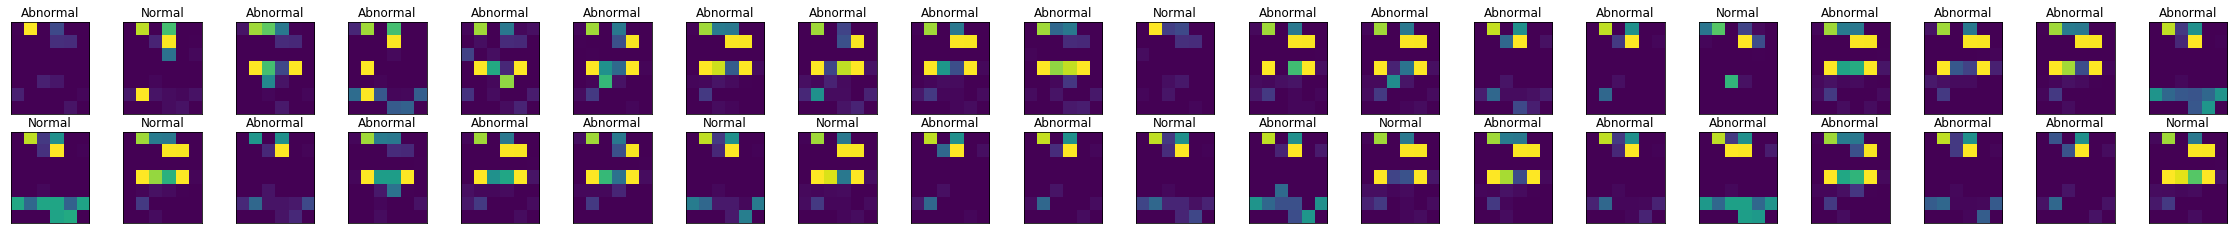

In [0]:
cnt = 40
cnt = math.ceil(cnt/2)*2
plt.figure(figsize=(cnt,cnt))

class_names = ['Normal', 'Abnormal']


for i in range(cnt):

    _ = plt.subplot(cnt/2,cnt/2,i+1)
    _ = plt.xticks([])
    _ = plt.yticks([])
    _ = plt.grid(False)
    a = np.reshape(train_x[i], newshape=(7,6))
    _ = plt.imshow(a)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    
    plt.title(class_names[int(test_y[i])])
plt.show()

In [0]:
model.compile(optimizer= tf.keras.optimizers.Adam(),
            loss= tf.keras.losses.SparseCategoricalCrossentropy(),
            metrics=['accuracy'])

In [0]:
model.fit(cnn_train_x, train_y, epochs= epochs)

Epoch 1/10
180371/180371 [==============================] - 36s 200us/sample - loss: 0.1931 - acc: 0.9031
Epoch 2/10
180371/180371 [==============================] - 36s 197us/sample - loss: 0.1584 - acc: 0.9207
Epoch 3/10
180371/180371 [==============================] - 36s 198us/sample - loss: 0.1500 - acc: 0.9256
Epoch 4/10
180371/180371 [==============================] - 35s 196us/sample - loss: 0.1466 - acc: 0.9286
Epoch 5/10
180371/180371 [==============================] - 35s 195us/sample - loss: 0.1444 - acc: 0.9301
Epoch 6/10
180371/180371 [==============================] - 35s 195us/sample - loss: 0.1429 - acc: 0.9303
Epoch 7/10
180371/180371 [==============================] - 35s 195us/sample - loss: 0.1419 - acc: 0.9312
Epoch 8/10
180371/180371 [==============================] - 35s 195us/sample - loss: 0.1409 - acc: 0.9319
Epoch 9/10
180371/180371 [==============================] - 35s 195us/sample - loss: 0.1399 - acc: 0.9324
Epoch 10/10
180371/180371 [===================

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 7, 6, 32)          320       
_________________________________________________________________
activation (Activation)      (None, 7, 6, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 5, 4, 32)          9248      
_________________________________________________________________
activation_1 (Activation)    (None, 5, 4, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 4, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 4, 64)          18496     
_________________________________________________________________
activation_2 (Activation)    (None, 5, 4, 64)          0

In [0]:
  model.evaluate(cnn_test_x, test_y)

77302/77302 [==============================] - 7s 91us/sample - loss: 0.1356 - acc: 0.9337


[0.13562935059771358, 0.9337404]

### Auto-Encoders

In [0]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model


In [0]:
auto_enc_x = []
for i in range(len(train_x)):
    if train_y[i]==0:
        auto_enc_x.append(train_x[i])
for i in range(int(len(test_x)/2)):
    if test_y[i]==0:
        auto_enc_x.append(test_x[i])
auto_enc_x = np.array(auto_enc_x)


In [0]:
auto_enc_test_x = test_x[int(len(test_y)/2):]
auto_enc_test_y = test_y[int(len(test_y)/2):]

In [0]:
auto_enc_x.shape

(78929, 42)

In [0]:
n_features = auto_enc_x.shape[1]

# this is the size of our encoded representations
encoding_dim = 42 # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

batch_size = 50
epochs = 100

In [0]:

# this is our input placeholder
input_img = Input(shape=(n_features,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(n_features, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [0]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [0]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [0]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [0]:
autoencoder.fit(auto_enc_x, auto_enc_x,
                epochs= epochs,
                batch_size= batch_size,
                shuffle=True,
                validation_data=(auto_enc_test_x, auto_enc_test_x))


Train on 78929 samples, validate on 38651 samples
Epoch 1/100
78929/78929 [==============================] - 7s 87us/sample - loss: 0.7069 - val_loss: 0.7016
Epoch 2/100
78929/78929 [==============================] - 6s 81us/sample - loss: 0.6924 - val_loss: 0.6871
Epoch 3/100
78929/78929 [==============================] - 6s 79us/sample - loss: 0.6756 - val_loss: 0.6711
Epoch 4/100
78929/78929 [==============================] - 6s 79us/sample - loss: 0.6573 - val_loss: 0.6540
Epoch 5/100
78929/78929 [==============================] - 6s 81us/sample - loss: 0.6376 - val_loss: 0.6354
Epoch 6/100
78929/78929 [==============================] - 7s 83us/sample - loss: 0.6162 - val_loss: 0.6152
Epoch 7/100
78929/78929 [==============================] - 6s 80us/sample - loss: 0.5928 - val_loss: 0.5932
Epoch 8/100
78929/78929 [==============================] - 6s 82us/sample - loss: 0.5674 - val_loss: 0.5693
Epoch 9/100
78929/78929 [==============================] - 6s 80us/sample - loss: 0.54

In [0]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(auto_enc_test_x)
decoded_imgs = decoder.predict(encoded_imgs)

In [0]:
error = abs(encoded_imgs - decoded_imgs)
error = np.mean(error, axis=1)

In [0]:
error[:19]

array([0.43838778, 0.6759939 , 0.28431553, 0.4389659 , 0.56080866,
       0.5712089 , 0.42715177, 0.6785251 , 0.46099526, 0.6571073 ,
       0.6879336 , 0.29038253, 0.43683097, 0.44519678, 0.6766341 ,
       0.34276676, 0.59471583, 0.61420316, 0.591522  ], dtype=float32)

In [0]:
threshold = 0.33
pred_y = [0 if x < threshold else 1 for x in error]

In [0]:
pred_y[:19]

[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1]

In [0]:
from sklearn.metrics import confusion_matrix 

In [0]:
cm = confusion_matrix(auto_enc_test_y, pred_y) 

cm 

array([[  601, 13470],
       [ 1100, 23480]])